In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [20]:
#import final data
data=pd.read_csv('us_home_data.csv')
data= data.drop(data.columns[0],axis=1)
# Get the basic statistical summary
stats_summary = data.describe()

print(data)
print("                 ***************************************************************                ")
print(stats_summary)



# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Handle missing values with forward and backward fill
df_cleaned = data.ffill().bfill()


print('   ')
print('                                   cleaned data               ')
print('                                   -------------               ')
print(df_cleaned.head())





           date  Case_Shiller_Index  CPIAUCSL  MEHOINUSA646N  MORTGAGE30US  \
0    2000-01-01             100.000   169.300        41990.0           NaN   
1    2000-02-01             100.571   170.000        41990.0           NaN   
2    2000-03-01             101.466   171.000        41990.0           NaN   
3    2000-04-01             102.540   170.900        41990.0           NaN   
4    2000-05-01             103.702   171.200        41990.0           NaN   
..          ...                 ...       ...            ...           ...   
286  2023-11-01             311.969   308.024        74580.0          6.79   
287  2023-12-01             310.774   308.742        74580.0          6.79   
288  2024-01-01             310.521   309.685        74580.0          6.79   
289  2024-02-01             312.632   311.054        74580.0          6.63   
290  2024-03-01             316.646   312.230        74580.0          6.63   

     UNRATE   HOUST  A191RL1Q225SBEA    POPTHM  
0       NaN  1

/var/folders/nh/31c2dc8x38j8nnkhrk0h4rnc0000gn/T/ipykernel_19726/1121203878.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')


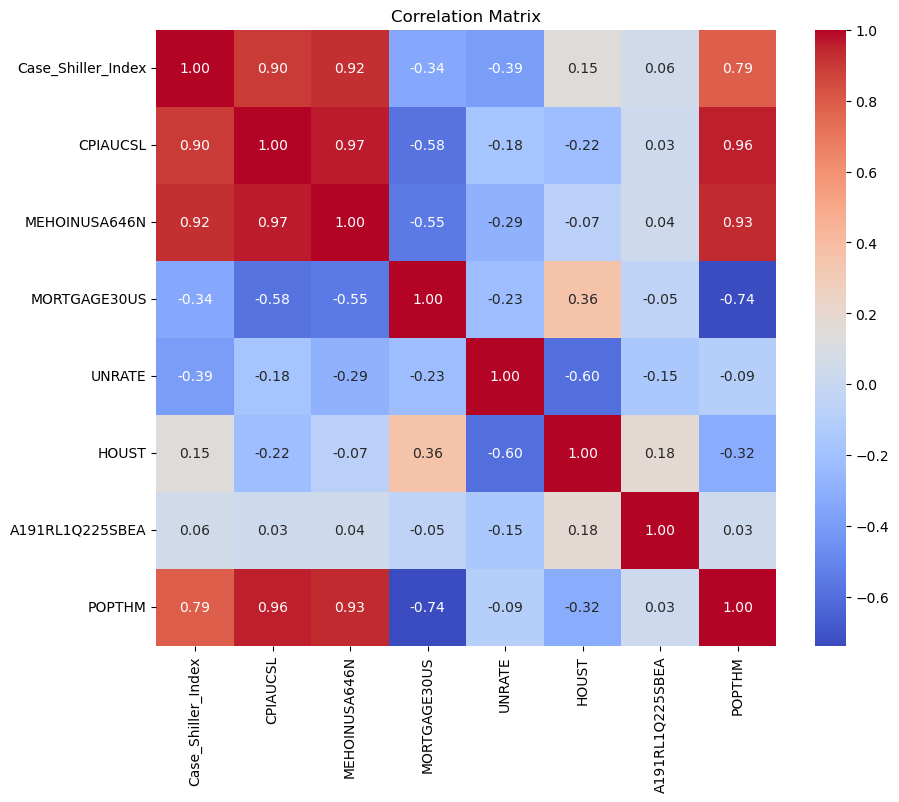

In [21]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


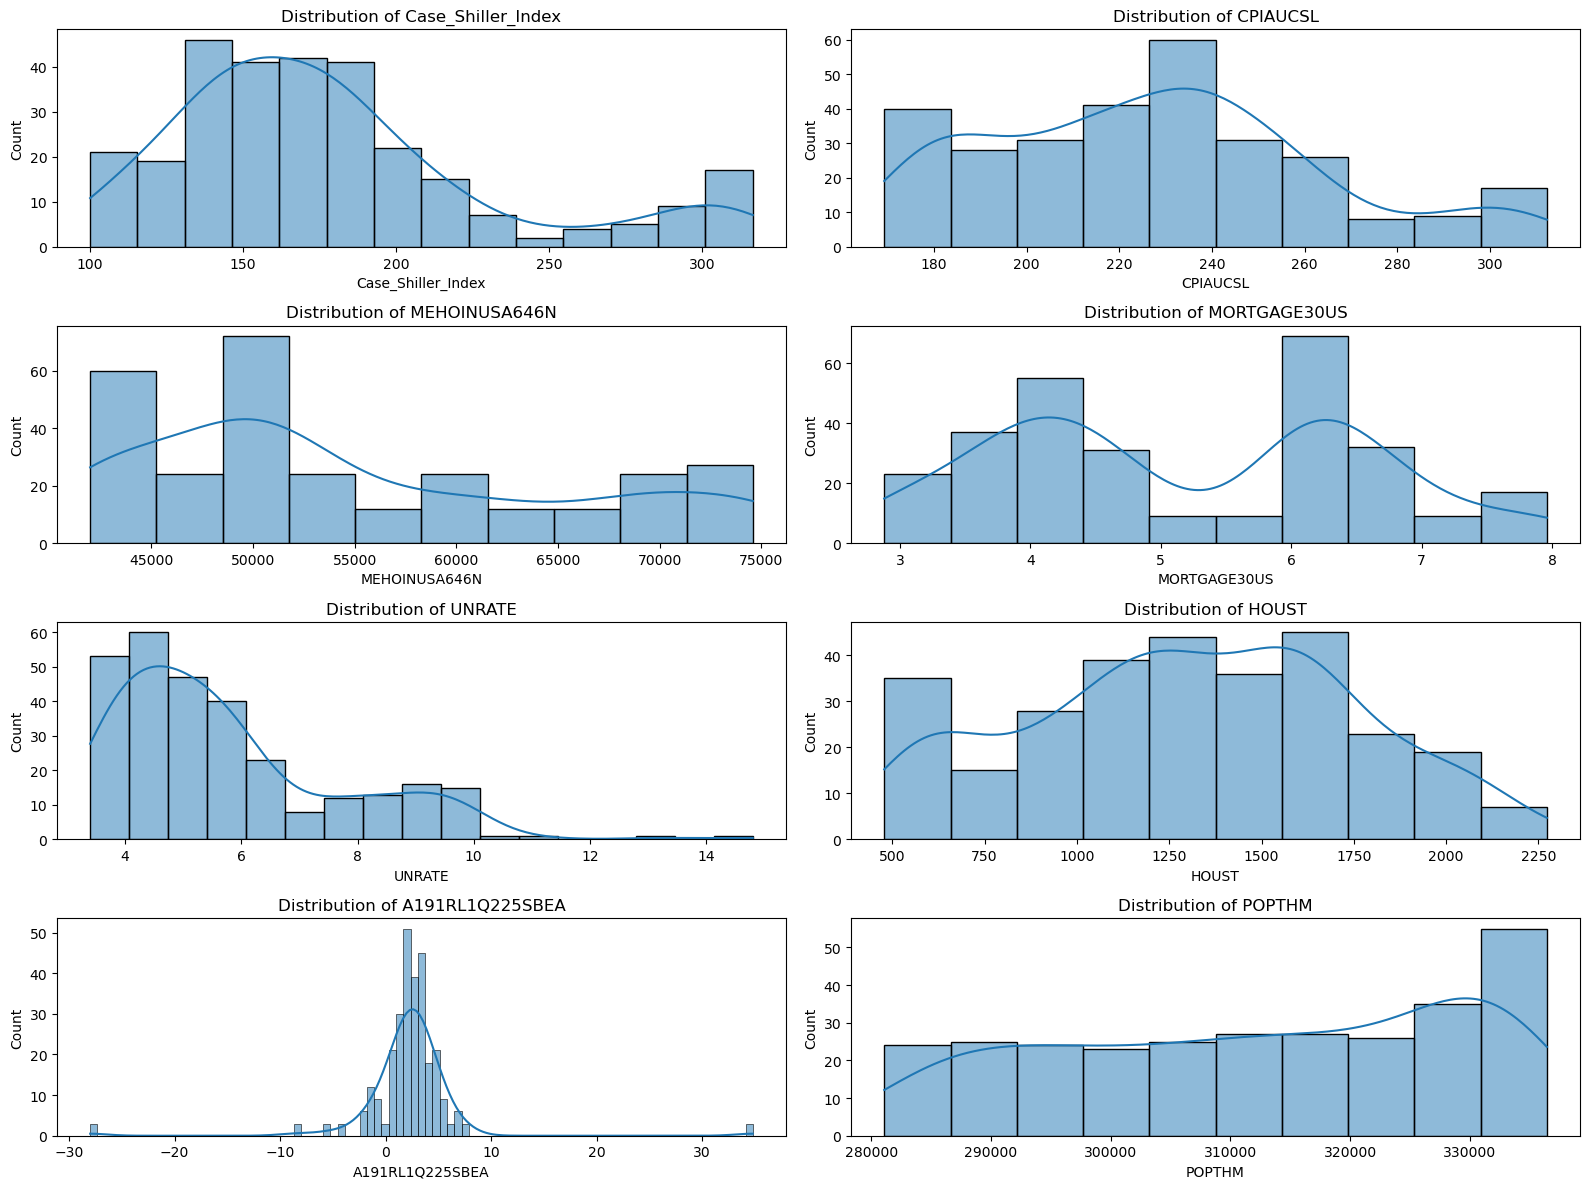

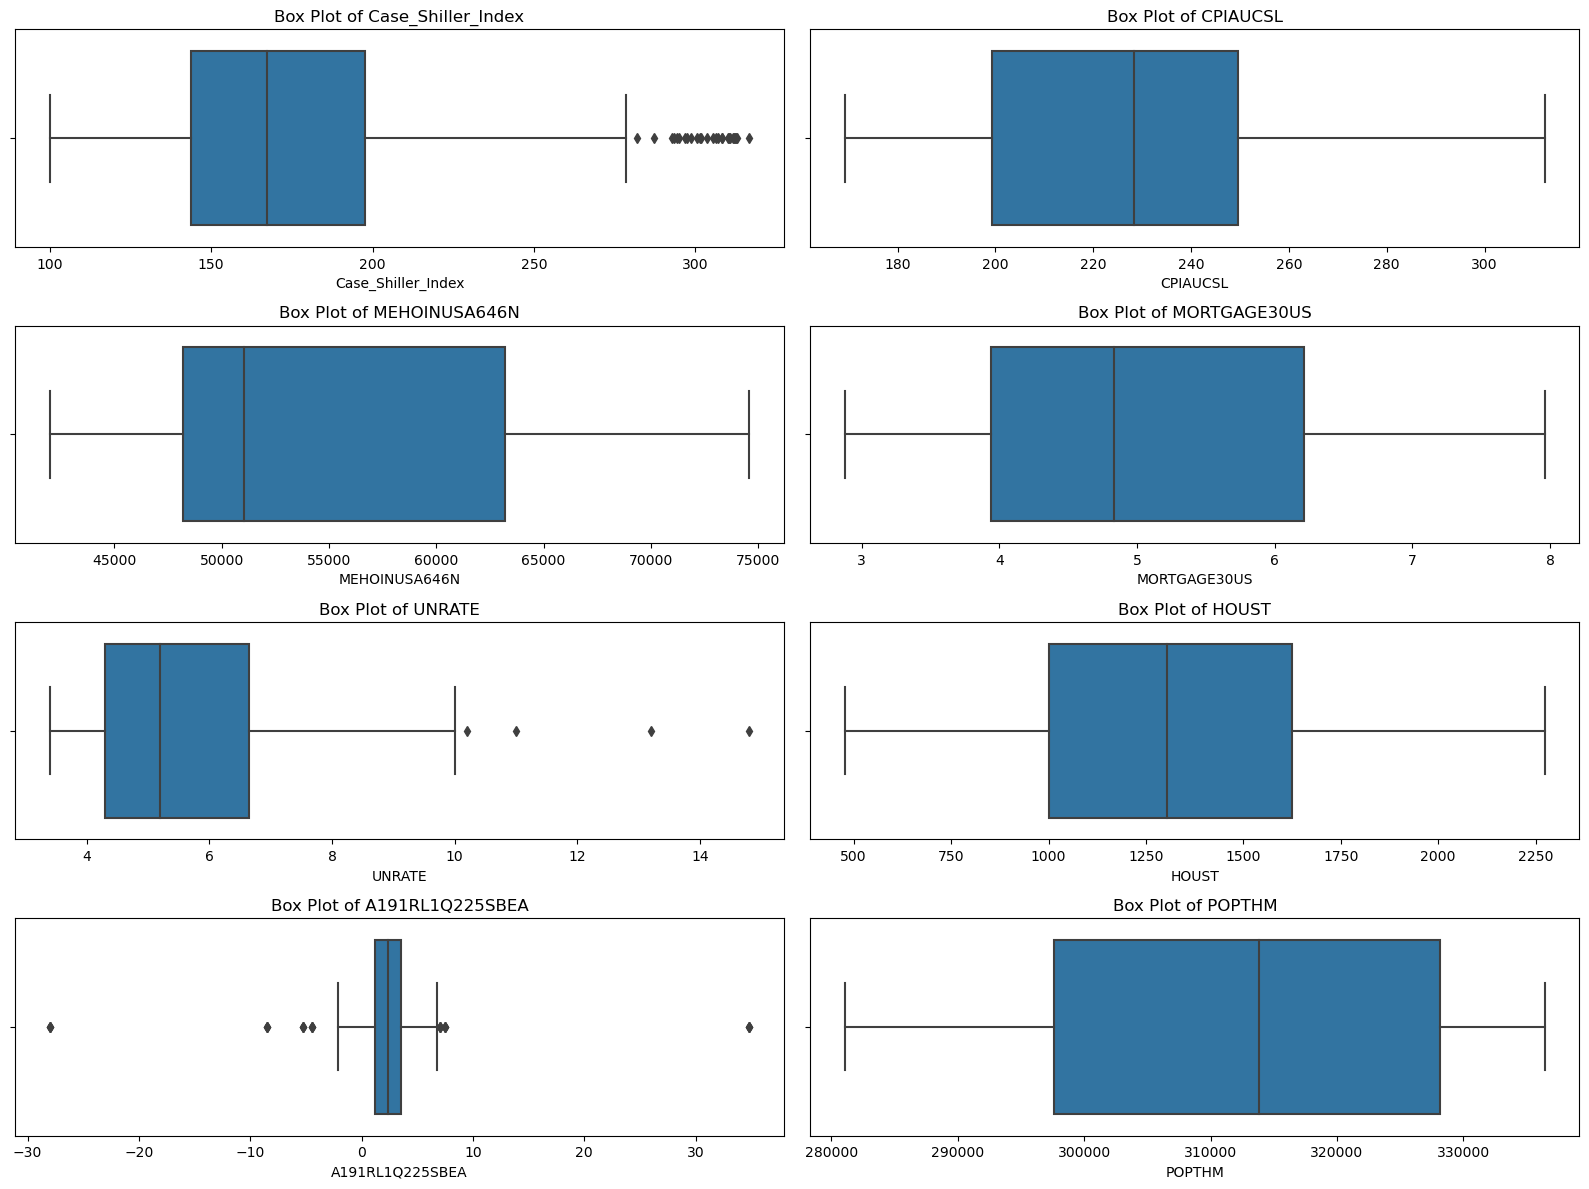

In [22]:

# Set up the matplotlib figure for histograms
plt.figure(figsize=(16, 12))

# List of columns to plot
columns = ['Case_Shiller_Index', 'CPIAUCSL', 'MEHOINUSA646N', 'MORTGAGE30US', 
           'UNRATE', 'HOUST', 'A191RL1Q225SBEA', 'POPTHM']

# Plot histograms
for i, col in enumerate(columns):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

# Set up the matplotlib figure for box plots
plt.figure(figsize=(16, 12))

# Plot box plots
for i, col in enumerate(columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    
plt.tight_layout()
plt.show()


In [23]:
#data preparation and feature engineering

#importing library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Generate lagged features (e.g., 1 month lag)
for col in df_cleaned.columns:
    if col != 'date':
        df_cleaned[f'{col}_lag1'] = df_cleaned[col].shift(1)

# Drop rows with NaN values generated by lagging
df_cleaned = df_cleaned.dropna()

# Define features (X) and target (y)
X = df_cleaned.drop(columns=['date', 'Case_Shiller_Index'])
y = df_cleaned['Case_Shiller_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train the models and evaluate them
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name} Performance:')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R²: {r2:.2f}')
    print('-' * 30)


Linear Regression Performance:
RMSE: 1.52
MAE: 1.12
R²: 1.00
------------------------------
Random Forest Performance:
RMSE: 1.68
MAE: 1.25
R²: 1.00
------------------------------
Gradient Boosting Performance:
RMSE: 1.63
MAE: 1.10
R²: 1.00
------------------------------


In [25]:
# Compare results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [0.19, 0.23, 0.95],
    'RMSE': [0.59, 0.86, 0.95],
    'R²': [1, 1, 1]
})
print(results)

               Model   MAE  RMSE  R²
0  Linear Regression  0.19  0.59   1
1      Random Forest  0.23  0.86   1
2  Gradient Boosting  0.95  0.95   1


In [26]:
# For Linear Regression model
lr_model = models['Linear Regression']
coefficients = lr_model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
7,Case_Shiller_Index_lag1,48.211571
0,CPIAUCSL,17.294772
9,MEHOINUSA646N_lag1,2.224163
14,POPTHM_lag1,1.698071
3,UNRATE,1.381184
12,HOUST_lag1,1.268970
10,MORTGAGE30US_lag1,0.893314
4,HOUST,0.377887
13,A191RL1Q225SBEA_lag1,0.064246
5,A191RL1Q225SBEA,-0.021239


In [27]:
# For Random Forest model
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance.sort_values(by='Importance', ascending=False)


,Feature,Importance
7,Case_Shiller_Index_lag1,0.484923
6,POPTHM,0.157790
14,POPTHM_lag1,0.134066
8,CPIAUCSL_lag1,0.115077
0,CPIAUCSL,0.074141
1,MEHOINUSA646N,0.009221
9,MEHOINUSA646N_lag1,0.009037
11,UNRATE_lag1,0.005044
3,UNRATE,0.004245
2,MORTGAGE30US,0.002693


In [28]:
# For Gradient Boosting model
rf_model = models['Gradient Boosting']
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance.sort_values(by='Importance', ascending=False)


,Feature,Importance
7,Case_Shiller_Index_lag1,0.427628
8,CPIAUCSL_lag1,0.199103
0,CPIAUCSL,0.185226
6,POPTHM,0.121822
14,POPTHM_lag1,0.048198
11,UNRATE_lag1,0.010956
9,MEHOINUSA646N_lag1,0.001968
10,MORTGAGE30US_lag1,0.001947
2,MORTGAGE30US,0.001539
1,MEHOINUSA646N,0.001096


# neural network

In [29]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [30]:
##neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/100


/Users/priyanshuraj/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32656.2500 - mean_absolute_error: 174.4673 - val_loss: 36045.1211 - val_mean_absolute_error: 182.2483
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32097.6152 - mean_absolute_error: 173.3792 - val_loss: 35894.2695 - val_mean_absolute_error: 181.8381
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32888.4766 - mean_absolute_error: 175.1055 - val_loss: 35721.4375 - val_mean_absolute_error: 181.3623
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33808.5078 - mean_absolute_error: 176.8165 - val_loss: 35523.9062 - val_mean_absolute_error: 180.8222
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35338.7773 - mean_absolute_error: 180.7932 - val_loss: 35282.7148 - val_mean_absolute_error: 180.1589
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33704.7617 - mean_absolute_error: 176.2607 - val_loss: 34968.2773 - val_mean_absolute_error: 179.2930
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Neural Network Performance:
RMSE: 19.49
MAE: 14.65
R²: 0.89


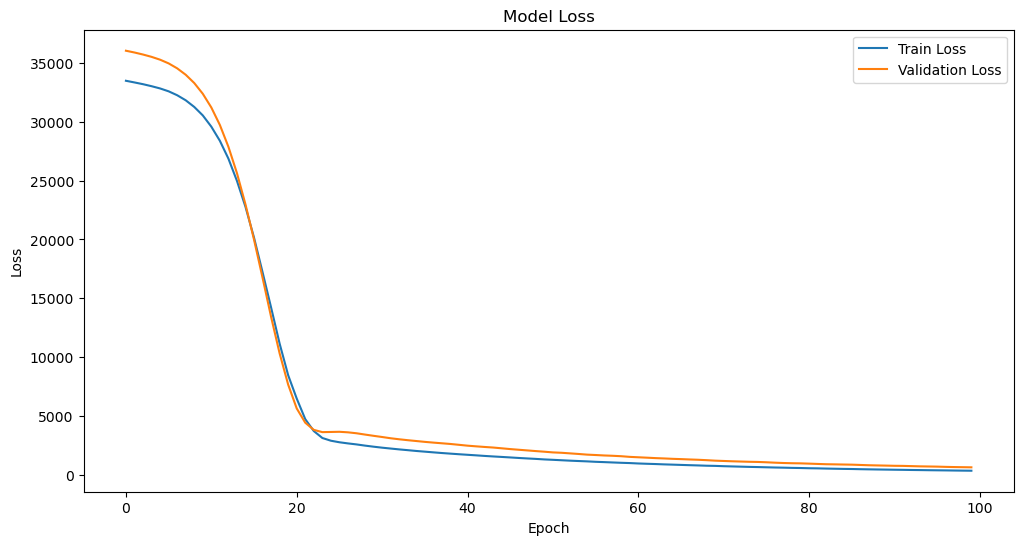

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Neural Network Performance:')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Interpretation
#Neural networks are often considered "black boxes" because interpreting their weights directly can be challenging. However, we can use techniques like:

#Permutation Feature Importance: Assess the importance of features by measuring the increase in the model's prediction error after permuting the feature.
#Partial Dependence Plots: Show the relationship between a feature and the predicted outcome, averaging out the influence of other features.

In [32]:
#using permutation feature importance
import numpy as np
from sklearn.inspection import permutation_importance

# Compute feature importances
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error')

# Display the feature importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': results.importances_mean})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78